In [5]:
import requests
requests.__version__

'2.24.0'

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the dependencies.
import pandas as pd

In [178]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ebac32a8750efc621be91692e8f18758


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ebac32a8750efc621be91692e8f18758&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01d"}],"base":"stations","main":{"temp":50.04,"feels_like":34.92,"temp_min":48,"temp_max":52,"pressure":1011,"humidity":38},"visibility":10000,"wind":{"speed":18.99,"deg":336,"gust":35.01},"clouds":{"all":0},"dt":1617042947,"sys":{"type":3,"id":2013408,"country":"US","sunrise":1617013881,"sunset":1617059172},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 50.04,
  'feels_like': 34.92,
  'temp_min': 48,
  'temp_max': 52,
  'pressure': 1011,
  'humidity': 38},
 'visibility': 10000,
 'wind': {'speed': 18.99, 'deg': 336, 'gust': 35.01},
 'clouds': {'all': 0},
 'dt': 1617042947,
 'sys': {'type': 3,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1617013881,
  'sunset': 1617059172},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 50.04,
  'feels_like': 34.92,
  'temp_min': 48,
  'temp_max': 52,
  'pressure': 1011,
  'humidity': 38},
 'visibility': 10000,
 'wind': {'speed': 18.99, 'deg': 336, 'gust': 35.01},
 'clouds': {'all': 0},
 'dt': 1617042947,
 'sys': {'type': 3,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1617013881,
  'sunset': 1617059172},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()

In [18]:
boston_data["coord"]["lat"]

42.3584

In [19]:
boston_data["main"]["temp_max"]

52

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 52 38 0 18.99


In [21]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2021, 3, 29, 18, 35, 47)

In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [23]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [132]:
# Loop through all the cities in our list.
cities=["San Francisco", "San Hose","New Orleans","Charlotte","New York", "Virginia","Minnesota", "New Jersey", "St Paul", "Chicago", "Texas", "California", "San Francisco", "Boston", "Los Angeles", "Philadelphia","Atlanta","Florida"]
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [133]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 49 of Set 1 | San Francisco
Processing Record 50 of Set 1 | San Hose
Processing Record 51 of Set 1 | New Orleans
Processing Record 52 of Set 1 | Charlotte
Processing Record 53 of Set 1 | New York
Processing Record 54 of Set 1 | Virginia
Processing Record 55 of Set 1 | Minnesota
Processing Record 56 of Set 1 | New Jersey
Processing Record 57 of Set 1 | St Paul
Processing Record 58 of Set 1 | Chicago
Processing Record 59 of Set 1 | Texas
Processing Record 60 of Set 1 | California
Processing Record 61 of Set 1 | San Francisco
Processing Record 62 of Set 1 | Boston
Processing Record 63 of Set 1 | Los Angeles
Processing Record 64 of Set 1 | Philadelphia
Processing Record 65 of Set 1 | Atlanta
Processing Record 66 of Set 1 | Florida


In [134]:
# Run an API request for each of the cities.
try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [135]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,California,38.3004,-76.5074,59.00,35,1,18.41,US,2021-03-29 18:36:16
1,Philadelphia,39.9523,-75.1638,55.99,35,20,18.41,US,2021-03-29 19:08:04
2,Philadelphia,39.9523,-75.1638,57.00,30,1,13.80,US,2021-03-29 21:04:49
3,Florida,28.7505,-82.5001,82.99,57,40,3.44,US,2021-03-29 21:09:29
4,Florida,28.7505,-82.5001,82.99,57,40,3.44,US,2021-03-29 21:09:29


In [136]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [137]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [138]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1617052762.7063417

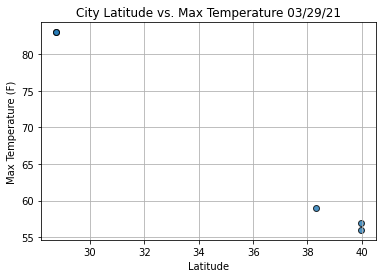

In [139]:
import matplotlib.pyplot as plt

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

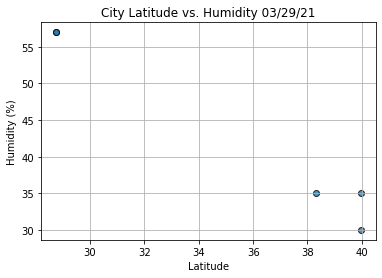

In [140]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

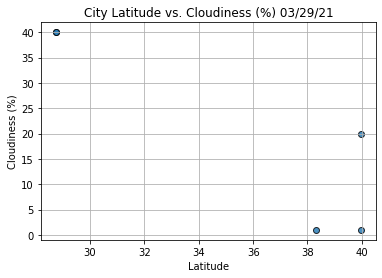

In [141]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

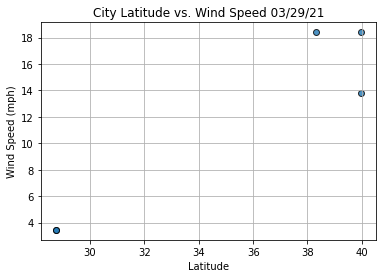

In [142]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [143]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [144]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
lngs = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [145]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [146]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

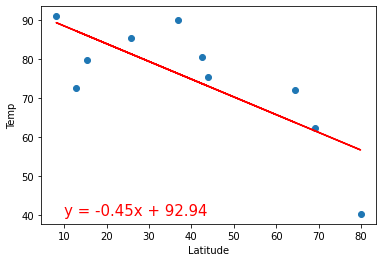

In [147]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [160]:
# x_values = np.array([10,20,30,40,50,60,70,80,90,100])
# y_values = np.array([10,20,30,40,50,60,70,80,90,100])

x_values = np.array([42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5])
y_values = np.array([80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0])

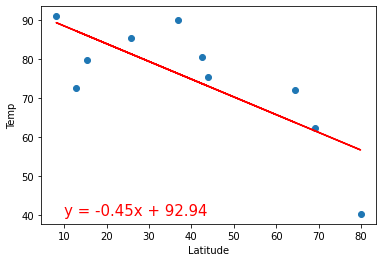

In [161]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [162]:
 # Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [163]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,California,38.3004,-76.5074,59.00,35,1,18.41,US,2021-03-29 18:36:16
1,Philadelphia,39.9523,-75.1638,55.99,35,20,18.41,US,2021-03-29 19:08:04
2,Philadelphia,39.9523,-75.1638,57.00,30,1,13.80,US,2021-03-29 21:04:49
3,Florida,28.7505,-82.5001,82.99,57,40,3.44,US,2021-03-29 21:09:29
4,Florida,28.7505,-82.5001,82.99,57,40,3.44,US,2021-03-29 21:09:29


In [164]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,California,38.3004,-76.5074,59.00,35,1,18.41,US,2021-03-29 18:36:16
1,Philadelphia,39.9523,-75.1638,55.99,35,20,18.41,US,2021-03-29 19:08:04
2,Philadelphia,39.9523,-75.1638,57.00,30,1,13.80,US,2021-03-29 21:04:49
3,Florida,28.7505,-82.5001,82.99,57,40,3.44,US,2021-03-29 21:09:29
4,Florida,28.7505,-82.5001,82.99,57,40,3.44,US,2021-03-29 21:09:29


In [165]:
city_data_df.loc[(city_data_df["Lat"] < 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [170]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lng"] < 0)]
# southern_hemi_df
# northern_hemi_df

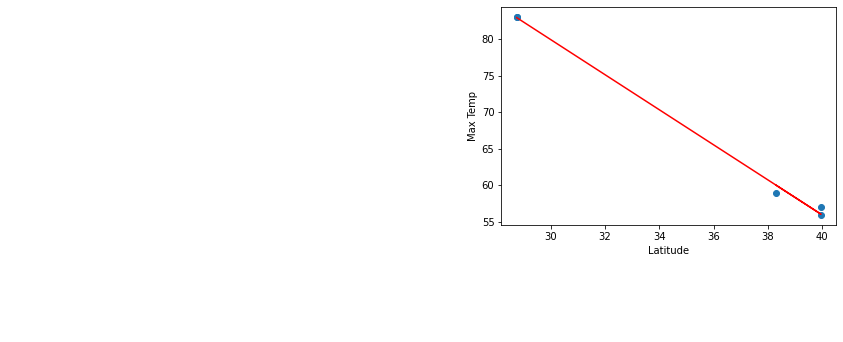

In [171]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

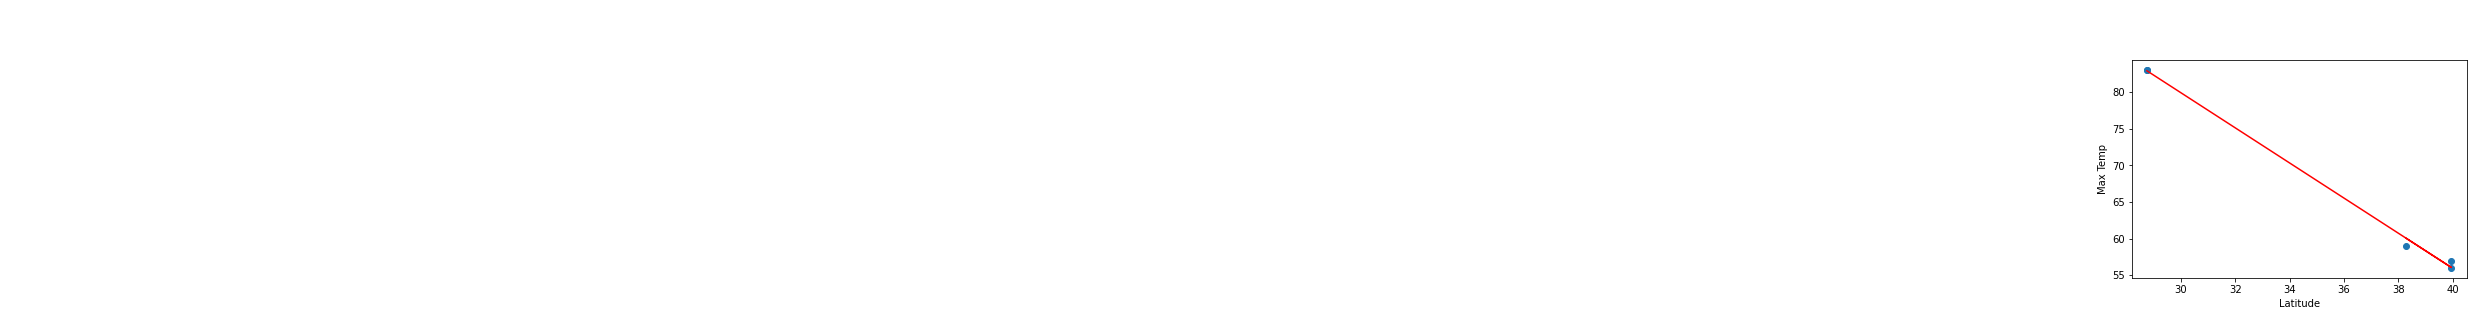

In [172]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

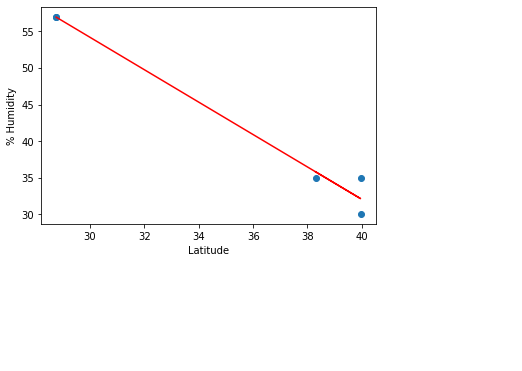

In [173]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [180]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))


SyntaxError: EOL while scanning string literal (<ipython-input-180-9c3e8b244753>, line 6)

In [176]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \n
                    for % Cloudiness', '% Cloudiness',(10,55))

SyntaxError: EOL while scanning string literal (<ipython-input-176-14e960679763>, line 6)

In [187]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-187-3dc99b339452>, line 6)

In [186]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-186-7024af74f12d>, line 6)

In [182]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-182-8c4f0e57bb27>, line 6)

In [189]:
conda install -c conda-forge gmaps

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\dybon\anaconda3

  added / updated specs:
    - gmaps


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    geojson-2.5.0              |             py_0          15 KB  conda-forge
    gmaps-0.9.0                |             py_0         1.7 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.8 MB

The following NEW packages will be INSTALLED:

  geojson            conda-forge/noarch::geojson-2.5.0-py_0
  gmaps              conda-forge/noarch::gmaps-0.9.0-py_0
  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38

The following packages will be SUP